In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import wrangle

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from pydataset import data


# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

# Modeling Exercises

## 1. Clustering with the Iris Dataset

    Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.
    
    b. Visualize the results of your clustering.
    
    c. Use the elbow method to visually select a good value for k.
    
    d. Repeat the clustering, this time with 3 different features.

In [2]:
df = data('iris')

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### a. Choose features other than the ones used in the lesson.

In [4]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [5]:
X = df[['sepal_width', 'petal_width']]

array([[<AxesSubplot:title={'center':'sepal_width'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

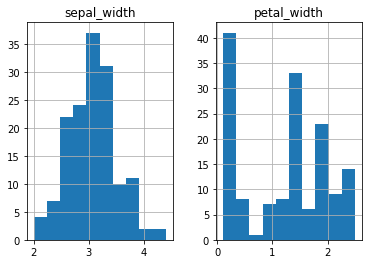

In [6]:
X.hist()

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [8]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 222)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled);

In [9]:

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [10]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
X_scaled['cluster'] = df.cluster.astype(str)

In [11]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)

### b. Visualize the results of your clustering.

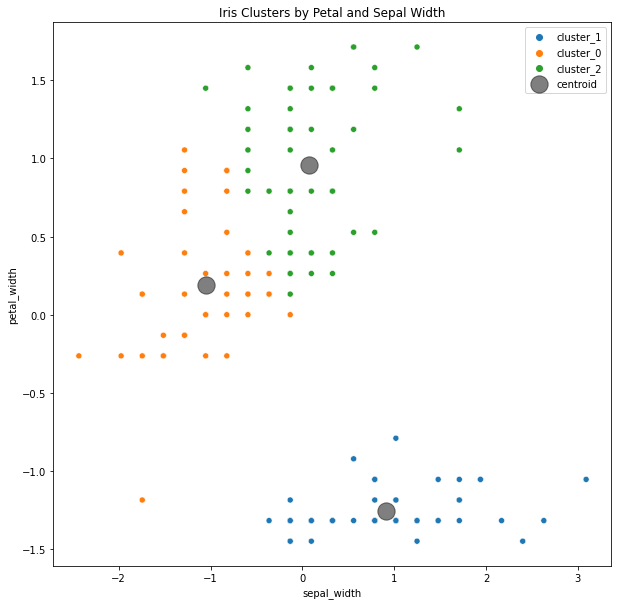

In [12]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = X_scaled, x = 'sepal_width', y = 'petal_width', hue = 'cluster')
centroids_scaled.plot.scatter(x='sepal_width',y='petal_width',ax = plt.gca(), color = 'black',alpha = 0.5, s=300, label = 'centroid')
plt.title('Iris Clusters by Petal and Sepal Width')
plt.legend()

###     c. Use the elbow method to visually select a good value for k.



In [13]:
X = df[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

125.36847212365322

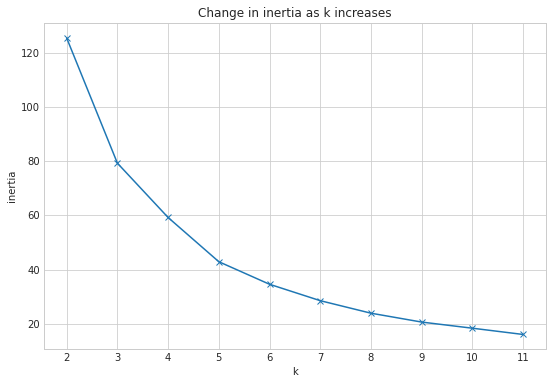

In [14]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Visually, k = 3, k = 4, or k = 5 seems to be the best values to use for k.

### d. Repeat the clustering, this time with 3 different features.

In [15]:
# retrieve fresh dataframe
df = data('iris')
# rename columns
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
# set three features
X = df[['sepal_length', 'sepal_width', 'petal_width']]

In [16]:
# scale X
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [17]:
# define the thing
kmeans = KMeans(n_clusters=3, random_state = 222)

# fit the thing
kmeans.fit(X_scaled)

# use the thing 
kmeans.predict(X_scaled);

In [18]:
# create column for cluster
df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [19]:
# adjust column for plotting purposes
df['cluster'] = 'cluster_' + df.cluster.astype(str)
X_scaled['cluster'] = df.cluster.astype(str)

In [20]:
# centroids scaled
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)

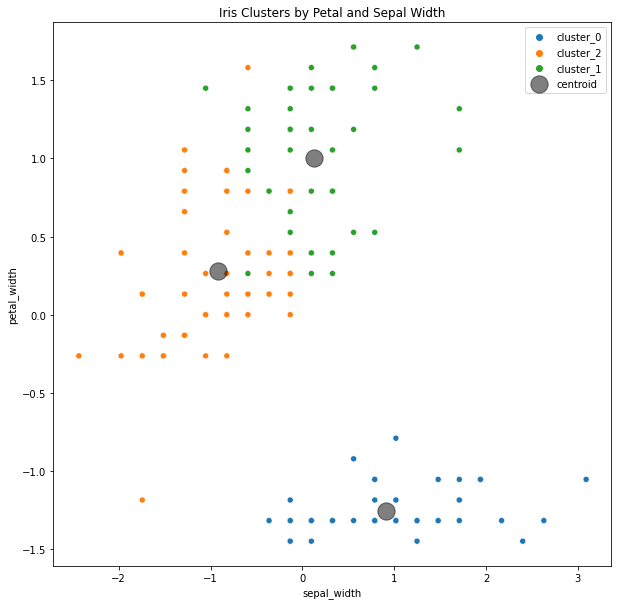

In [21]:
# visualize
plt.figure(figsize = (10,10))
sns.scatterplot(data = X_scaled, x = 'sepal_width', y = 'petal_width', hue = 'cluster')
centroids_scaled.plot.scatter(x='sepal_width',y='petal_width',ax = plt.gca(), color = 'black',alpha = 0.5, s=300, label = 'centroid')
plt.title('Iris Clusters by Petal and Sepal Width')
plt.legend()

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!



In [22]:
mall_df = wrangle.wrangle_mall_df()

In [23]:
mall_df.head()

,age,annual_income,spending_score,is_male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annual_income'}>],
       [<AxesSubplot:title={'center':'spending_score'}>,
        <AxesSubplot:title={'center':'is_male'}>]], dtype=object)

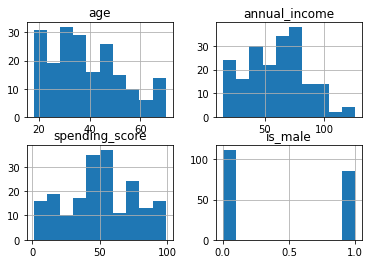

In [24]:
mall_df.hist()

In [25]:
# select features
X = mall_df[['annual_income','spending_score']]

In [26]:
# scale X
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

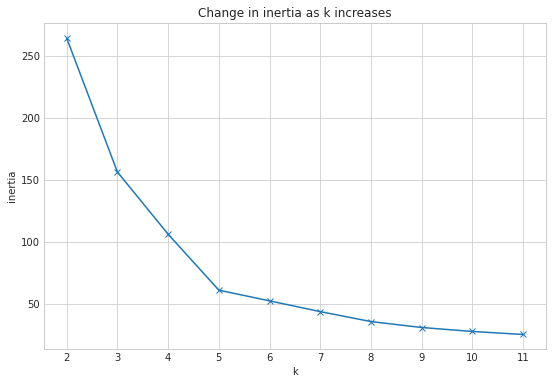

In [27]:
# elbow method to choose clusters
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

k = 5 or 6

In [28]:
# define the thing
kmeans = KMeans(n_clusters=5, random_state = 222)

# fit the thing
kmeans.fit(X_scaled)

# use the thing 
kmeans.predict(X_scaled);

In [29]:
# create column for cluster
mall_df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [30]:
# adjust column for plotting purposes
df['cluster'] = 'cluster_' + df.cluster.astype(str)
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)

In [31]:
# centroids scaled
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)

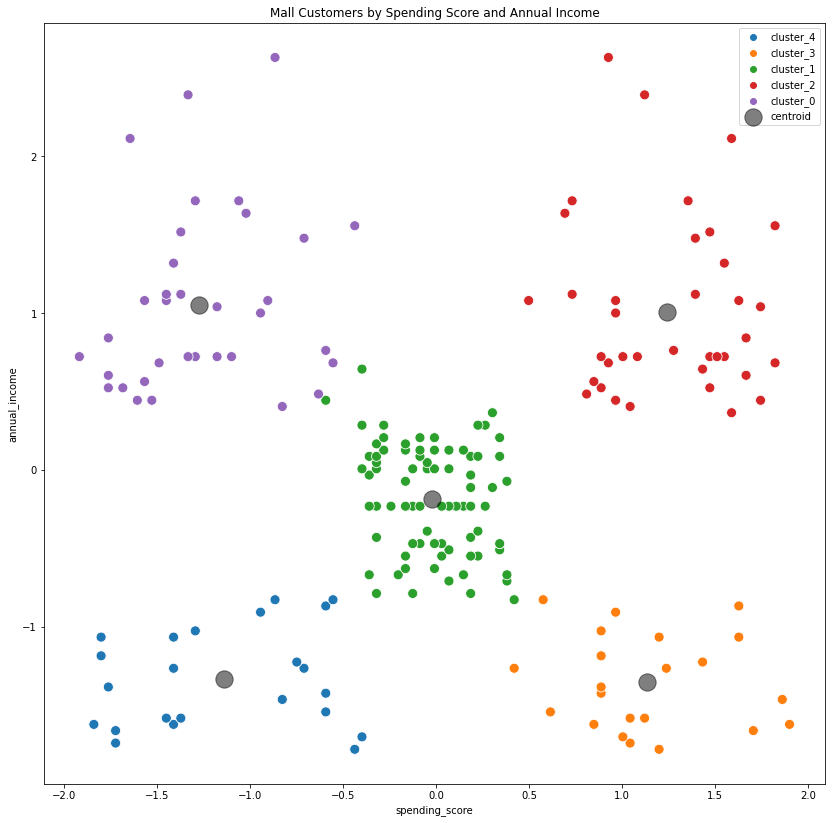

In [32]:
# visualize
plt.figure(figsize = (14,14))
sns.scatterplot(data = X_scaled, x = 'spending_score', y = 'annual_income', hue = 'cluster', s = 100)
centroids_scaled.plot.scatter(x='spending_score',y='annual_income',ax = plt.gca(), color = 'black',alpha = 0.5, s=300, label = 'centroid')
plt.title('Mall Customers by Spending Score and Annual Income')
plt.legend(loc = 'upper right')

## 3. How does scaling impact the results of clustering?
    
    Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.


### Bonus
    a. Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
    b. Visualize the data and guess the number and shape of the clusters.
    c. Implement the KMeans algorithm on unscaled data and visualize the clusters.
    d. Repeat the step above but with scaled data. 
    e. Write down the takeaways from this exercise.

In [33]:
# read csv
df = pd.read_csv('cluster_data.csv')

In [34]:
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


<AxesSubplot:xlabel='x', ylabel='y'>

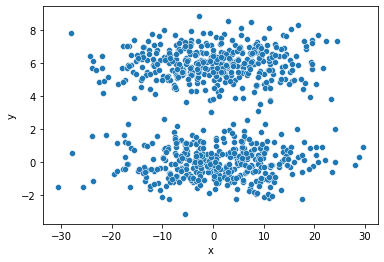

In [35]:
# visualize data
sns.scatterplot(data = df, x = 'x', y = 'y')

### Bonus:
It looks like there are two clusters.

In [36]:
# scale data
scaler = StandardScaler().fit(df)
df_scaled = pd.DataFrame(scaler.transform(df), columns= df.columns).set_index([df.index.values])

In [37]:
# define the thing
kmeans = KMeans(n_clusters=2, random_state = 123)
kmeans_unscaled = KMeans(n_clusters = 2, random_state = 123)
# fit the thing
kmeans.fit(df_scaled)
kmeans_unscaled.fit(df)
# use the thing 
kmeans.predict(df_scaled)
kmeans_unscaled.predict(df);

In [38]:
# create cluster column for dataframes
df_scaled['cluster'] = kmeans.predict(df_scaled)
df['cluster'] = kmeans.predict(df)

In [39]:
df_scaled.rename(columns={'x':'x_scaled','y':'y_scaled','cluster':'cluster_scaled'}, inplace = True)

<AxesSubplot:xlabel='x_scaled', ylabel='y_scaled'>

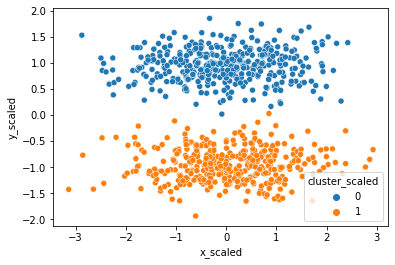

In [40]:
# visualize scaled data
sns.scatterplot(data = df_scaled, x = 'x_scaled', y = 'y_scaled', hue = 'cluster_scaled')

In [41]:
kmeans.inertia_

875.0106971857299

<AxesSubplot:xlabel='x', ylabel='y'>

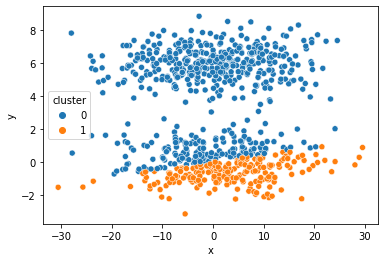

In [42]:
# visualize unscaled data
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'cluster')

In [43]:
kmeans_unscaled.inertia_

35379.036324112

In [44]:
df_diff = pd.concat([df,df_scaled], axis = 1)

In [45]:
df_diff.head()

,x,y,cluster,x_scaled,y_scaled,cluster_scaled
0,-3.641747,0.121540,0,-0.419211,-0.904027,1
1,-7.620447,1.810897,0,-0.821099,-0.368472,1
2,-6.505373,0.068072,0,-0.708466,-0.920978,1
3,7.730963,0.585521,0,0.729546,-0.756937,1
4,17.283668,0.344804,1,1.694464,-0.833249,1


In [46]:
df_diff['error'] = df_diff.cluster == df_diff.cluster_scaled

In [47]:
df_diff.error.mean()

0.77

### 3. and Bonus: 
The scaled data is more accurate in creating clusters than the unscaled data. The shape looks the same whether it's scaled or unscaled, but the weight of each axis is different for each dataframe. In addition to the range on the x and y axis, we can see the differences in location of 0 on the y axis and how that can affect clustering.

### Modeling on Zillow

In [48]:
df = wrangle.wrangle_zillow()

In [49]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Orange
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Ventura
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Orange
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Los_Angeles
6,12095076,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,6.037461e+07,47019.0,...,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,-0.001011,2017-01-01,Los_Angeles


In [50]:
df.drop(columns=['transactiondate', 'county'], inplace = True)

In [51]:
train, validate, test = wrangle.split_data(df)

In [57]:
X_train = train[['calculatedfinishedsquarefeet','taxvaluedollarcnt']]
y_train = train.logerror

In [58]:
# scale data
scaler = StandardScaler().fit(X_train)
X_scaled = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns).set_index([X_train.index.values])

In [59]:
X_scaled.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt
71233,-0.649571,-0.520848
58660,-0.551643,-0.711745
6292,-0.649571,-0.353380
73171,-0.738983,-0.555825
14776,-0.681504,-0.291018


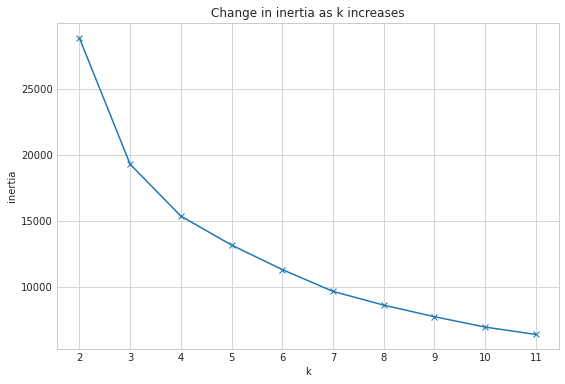

In [61]:
# elbow method to choose clusters
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [62]:
# define the thing
kmeans = KMeans(n_clusters=4, random_state = 222)

# fit the thing
kmeans.fit(X_scaled)

# use the thing 
kmeans.predict(X_scaled);

In [63]:
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [75]:
X_scaled['cluster'] = X_scaled.cluster.astype(str)

In [76]:
X_scaled.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,cluster
71233,-0.649571,-0.520848,0
58660,-0.551643,-0.711745,0
6292,-0.649571,-0.353380,0
73171,-0.738983,-0.555825,0
14776,-0.681504,-0.291018,0


In [77]:
# centroids scaled
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X_train.columns)

In [78]:
centroids_scaled.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,-0.619292,-0.442384
1,1.563870,1.310145
2,0.378222,0.039401
3,3.041671,4.503327


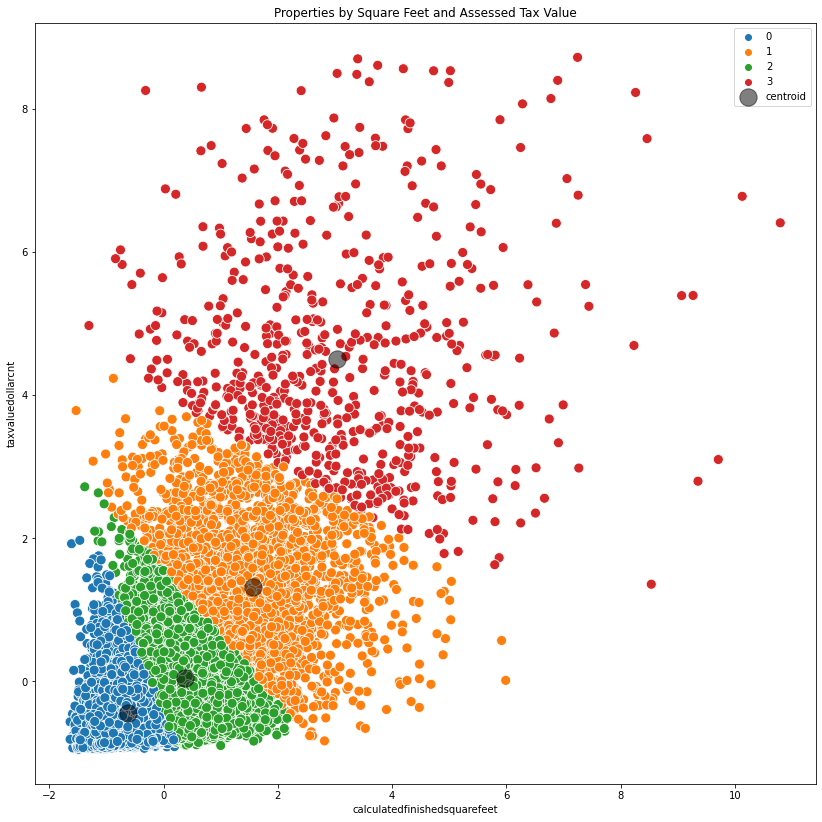

In [79]:
# visualize
plt.figure(figsize = (14,14))
sns.scatterplot(data = X_scaled, x = 'calculatedfinishedsquarefeet', y = 'taxvaluedollarcnt', hue = 'cluster', s = 100)
centroids_scaled.plot.scatter(x='calculatedfinishedsquarefeet',y='taxvaluedollarcnt',ax = plt.gca(), color = 'black',alpha = 0.5, s=300, label = 'centroid')
plt.title('Properties by Square Feet and Assessed Tax Value')
plt.legend()